# Clasificación de Estados de la Republica con LSM

## Acerca del dataset

#### Este dataset fue recolectado utilizando como base los gestos que aparecen en el siguiente video de facebook:

<video width="640" height="360" controls>
<source src="../data/facebookVideo/387176081_652120097025203_2811903331534106935_n.mp4" type="video/mp4">
<p>Link del video: <a src="https://www.facebook.com/watch/?v=1656778048181003">Click aqui</a></p>
</video>

#### Para esto, se grabaron una serie de video repitiendo los gestos. A continuación algunos de estos videos:

<video width="640" height="360" controls>
    <source src="../data/GESTURES_VIDEO/AGUASCALIENTES/sena1_test.MOV" type="video/mp4">
    <p>Video no encontrado o no se puede reproducir</p>
</video>
<video width="640" height="360" controls>
    <source src="../data/GESTURES_VIDEO/MORELOS/sena1_test.MOV" type="video/mp4">
    <p>Video no encontrado o no se puede reproducir</p>
</video>
<video width="640" height="360" controls>
    <source src="../data/GESTURES_VIDEO/SONORA/sena1_test.MOV" type="video/mp4">
    <p>Video no encontrado o no se puede reproducir</p>
</video>
<video width="640" height="360" controls>
    <source src="../data/GESTURES_VIDEO/SINALOA/sena1_test.MOV" type="video/mp4">
    <p>Video no encontrado o no se puede reproducir</p>
</video>

## Librerias utilizadas

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy

## Analisis Exploratorio

### Conjunto de datos en 2D

In [2]:
dataframes = []
dir_path = '../data/2d_DATA/'
for folder, i in zip(os.listdir(dir_path), range(len(os.listdir(dir_path)))):
    path = os.path.join(dir_path, folder)
    if os.path.isdir(path):
        for file in os.listdir(path=path):
            if file.endswith(f'test_{i}.csv'):
                continue
            if file.endswith('.csv'):
                path_file = os.path.join(path, file)
                df = pd.read_csv(path_file)
                dataframes.append(df)
df_2d = pd.concat(dataframes, ignore_index=True)
df_2d

,class,hand,k0x,k0y,k1x,k1y,k2x,k2y,k3x,k3y,...,k16x,k16y,k17x,k17y,k18x,k18y,k19x,k19y,k20x,k20y
0,0,Right,0.0,0.0,-0.228782,-0.095941,-0.350554,-0.247232,-0.442804,-0.361624,...,-0.380074,-0.265683,-0.036900,-0.357934,-0.306273,-0.369004,-0.383764,-0.284133,-0.380074,-0.214022
1,0,Right,0.0,0.0,-0.249110,-0.131673,-0.370107,-0.274021,-0.459075,-0.377224,...,-0.402135,-0.306050,-0.049822,-0.359431,-0.298932,-0.395018,-0.380783,-0.323843,-0.384342,-0.256228
2,0,Right,0.0,0.0,-0.248252,-0.143357,-0.363636,-0.286713,-0.444056,-0.391608,...,-0.395105,-0.304196,-0.045455,-0.363636,-0.286713,-0.402098,-0.370629,-0.332168,-0.384615,-0.258741
3,0,Right,0.0,0.0,-0.245675,-0.145329,-0.359862,-0.287197,-0.439446,-0.387543,...,-0.404844,-0.318339,-0.048443,-0.373702,-0.290657,-0.415225,-0.370242,-0.342561,-0.373702,-0.262976
4,0,Right,0.0,0.0,-0.245675,-0.145329,-0.356401,-0.283737,-0.439446,-0.387543,...,-0.408304,-0.328720,-0.055363,-0.384083,-0.294118,-0.429066,-0.366782,-0.349481,-0.373702,-0.269896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3741,31,Right,0.0,0.0,0.020325,-0.154472,0.109756,-0.296748,0.300813,-0.325203,...,0.357724,-0.191057,0.471545,-0.211382,0.593496,-0.231707,0.512195,-0.162602,0.422764,-0.134146
3742,31,Right,0.0,0.0,0.004739,-0.165877,0.118483,-0.341232,0.331754,-0.360190,...,0.421801,-0.180095,0.563981,-0.227488,0.696682,-0.218009,0.582938,-0.146919,0.488152,-0.123223
3743,31,Right,0.0,0.0,0.018072,-0.198795,0.156627,-0.379518,0.421687,-0.379518,...,0.680723,-0.138554,0.740964,-0.234940,0.927711,-0.265060,0.861446,-0.174699,0.740964,-0.108434
3744,31,Right,0.0,0.0,-0.006289,-0.125786,0.100629,-0.264151,0.345912,-0.283019,...,0.748428,-0.050314,0.761006,-0.163522,0.981132,-0.157233,0.911950,-0.056604,0.786164,-0.006289


### Conjunto de datos en 3D

In [3]:
dataframes = []
dir_path = '../data/3d_DATA/'
for folder, i in zip(os.listdir(dir_path), range(len(os.listdir(dir_path)))):
    path = os.path.join(dir_path, folder)
    if os.path.isdir(path):
        for file in os.listdir(path=path):
            if file.endswith(f'test_{i}.csv'):
                continue
            if file.endswith('.csv'):
                path_file = os.path.join(path, file)
                df = pd.read_csv(path_file)
                dataframes.append(df)
df_3d = pd.concat(dataframes, ignore_index=True)
df_3d

,class,hand,k0x,k0y,k0z,k1x,k1y,k1z,k2x,k2y,...,k17z,k18x,k18y,k18z,k19x,k19y,k19z,k20x,k20y,k20z
0,0,Right,0.0,0.0,0.0,-0.228782,-0.095941,8.591517e-06,-0.350554,-0.247232,...,-0.000091,-0.306273,-0.369004,-0.000131,-0.383764,-0.284133,-0.000130,-0.380074,-0.214022,-0.000118
1,0,Right,0.0,0.0,0.0,-0.249110,-0.131673,-1.815832e-06,-0.370107,-0.274021,...,-0.000092,-0.298932,-0.395018,-0.000129,-0.380783,-0.323843,-0.000122,-0.384342,-0.256228,-0.000107
2,0,Right,0.0,0.0,0.0,-0.248252,-0.143357,6.042035e-06,-0.363636,-0.286713,...,-0.000095,-0.286713,-0.402098,-0.000127,-0.370629,-0.332168,-0.000120,-0.384615,-0.258741,-0.000106
3,0,Right,0.0,0.0,0.0,-0.245675,-0.145329,4.610900e-06,-0.359862,-0.287197,...,-0.000093,-0.290657,-0.415225,-0.000129,-0.370242,-0.342561,-0.000123,-0.373702,-0.262976,-0.000109
4,0,Right,0.0,0.0,0.0,-0.245675,-0.145329,-2.829210e-07,-0.356401,-0.283737,...,-0.000090,-0.294118,-0.429066,-0.000125,-0.366782,-0.349481,-0.000120,-0.373702,-0.269896,-0.000107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3741,31,Right,0.0,0.0,0.0,0.020325,-0.154472,-8.763299e-05,0.109756,-0.296748,...,-0.000040,0.593496,-0.231707,-0.000088,0.512195,-0.162602,-0.000081,0.422764,-0.134146,-0.000062
3742,31,Right,0.0,0.0,0.0,0.004739,-0.165877,-8.442057e-05,0.118483,-0.341232,...,-0.000061,0.696682,-0.218009,-0.000116,0.582938,-0.146919,-0.000106,0.488152,-0.123223,-0.000084
3743,31,Right,0.0,0.0,0.0,0.018072,-0.198795,-1.011594e-04,0.156627,-0.379518,...,-0.000077,0.927711,-0.265060,-0.000145,0.861446,-0.174699,-0.000147,0.740964,-0.108434,-0.000131
3744,31,Right,0.0,0.0,0.0,-0.006289,-0.125786,-1.377506e-04,0.100629,-0.264151,...,-0.000115,0.981132,-0.157233,-0.000189,0.911950,-0.056604,-0.000194,0.786164,-0.006289,-0.000181


### Visualizacion

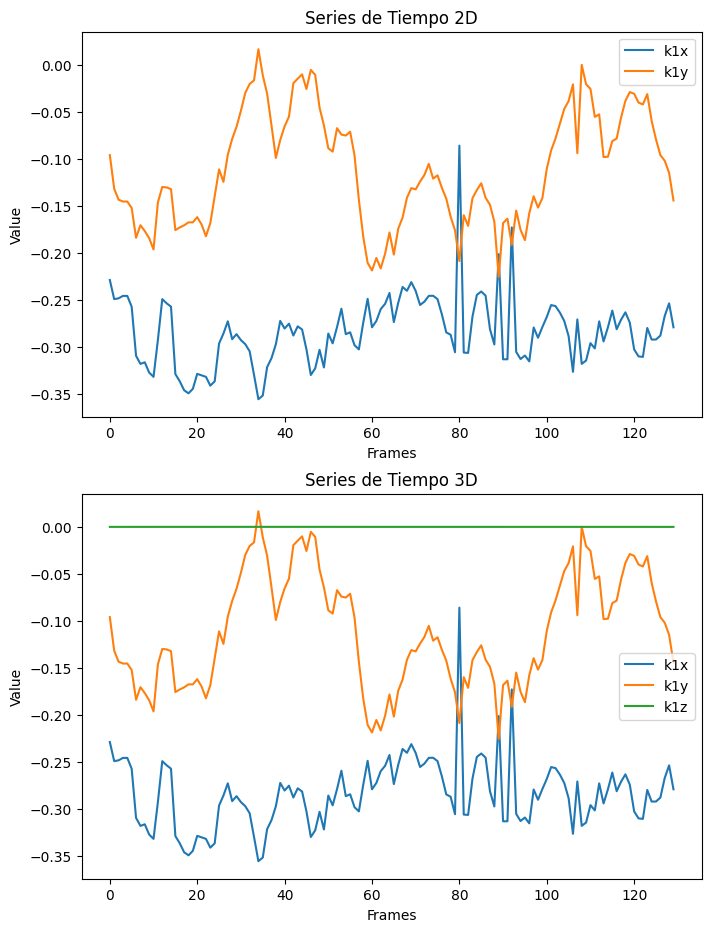

In [4]:
hand2d = df_2d.loc[df_2d['class'] == 0, ['k1x', 'k1y']]
hand3d = df_3d.loc[df_3d['class'] == 0, ['k1x', 'k1y', 'k1z']]
fig, ax = plt.subplots(2,1, figsize=(8,11))
sns.lineplot(data=hand2d, dashes=False, ax=ax[0])
ax[0].set_xlabel('Frames')
ax[0].set_ylabel('Value')
ax[0].set_title('Series de Tiempo 2D')
sns.lineplot(data=hand3d, dashes=False, ax=ax[1])
ax[1].set_xlabel('Frames')
ax[1].set_ylabel('Value')
ax[1].set_title('Series de Tiempo 3D')
plt.show()

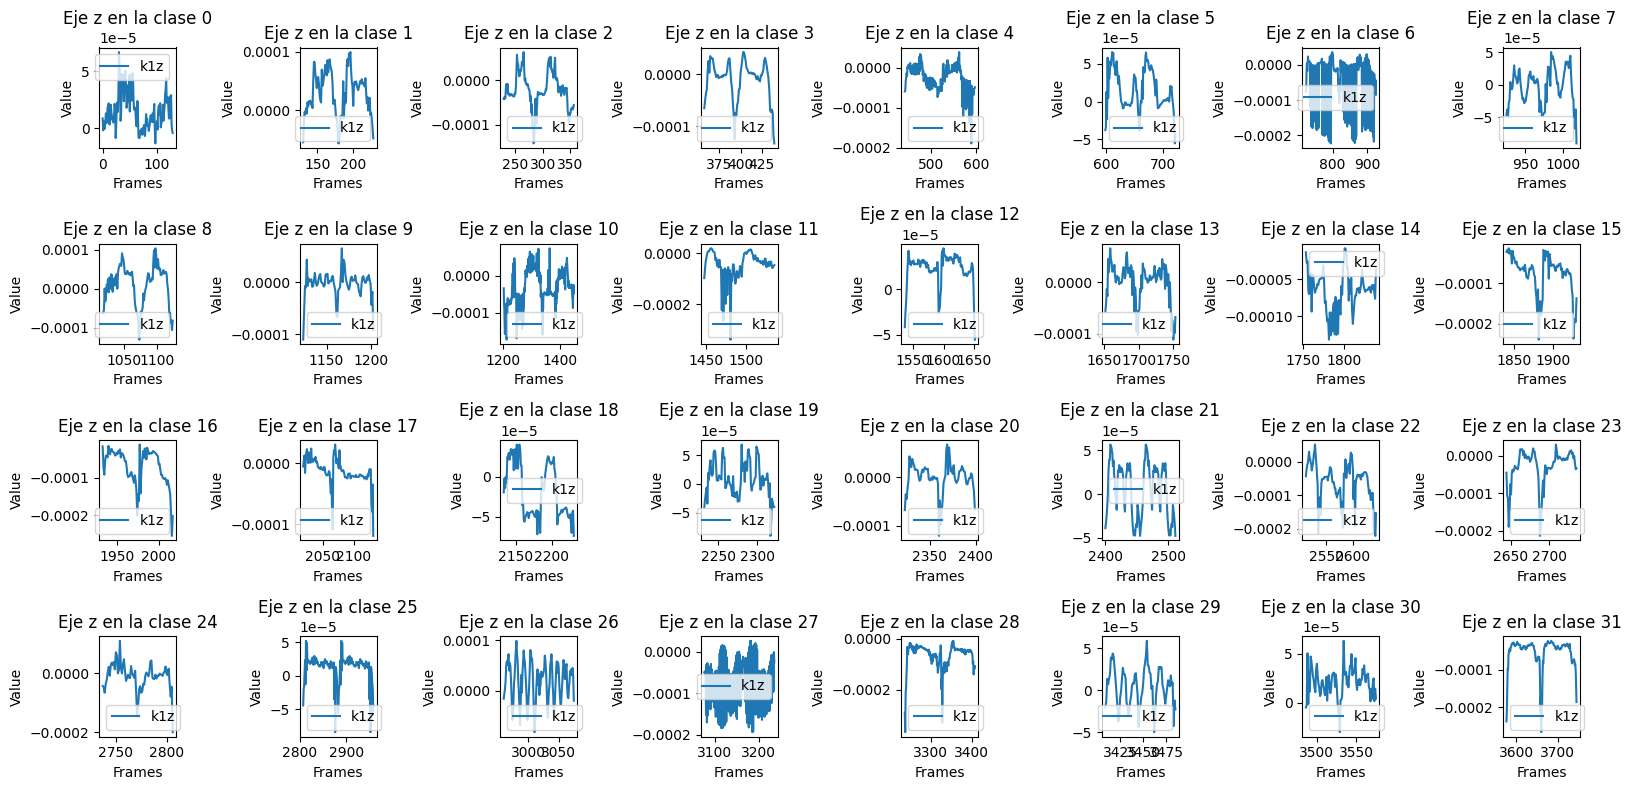

In [5]:
fig, ax = plt.subplots(4,8, figsize=(16,8))
for i, category in enumerate(df_3d['class'].unique()):
    row = i // 8
    col = i % 8
    hand3d = df_3d.loc[df_3d['class'] == category, ['k1z']]
    sns.lineplot(data=hand3d, ax=ax[row, col])
    ax[row, col].set_ylabel('Value')
    ax[row, col].set_title(f'Eje z en la clase {category}')
    ax[row, col].set_xlabel('Frames')
plt.tight_layout()    
plt.show()

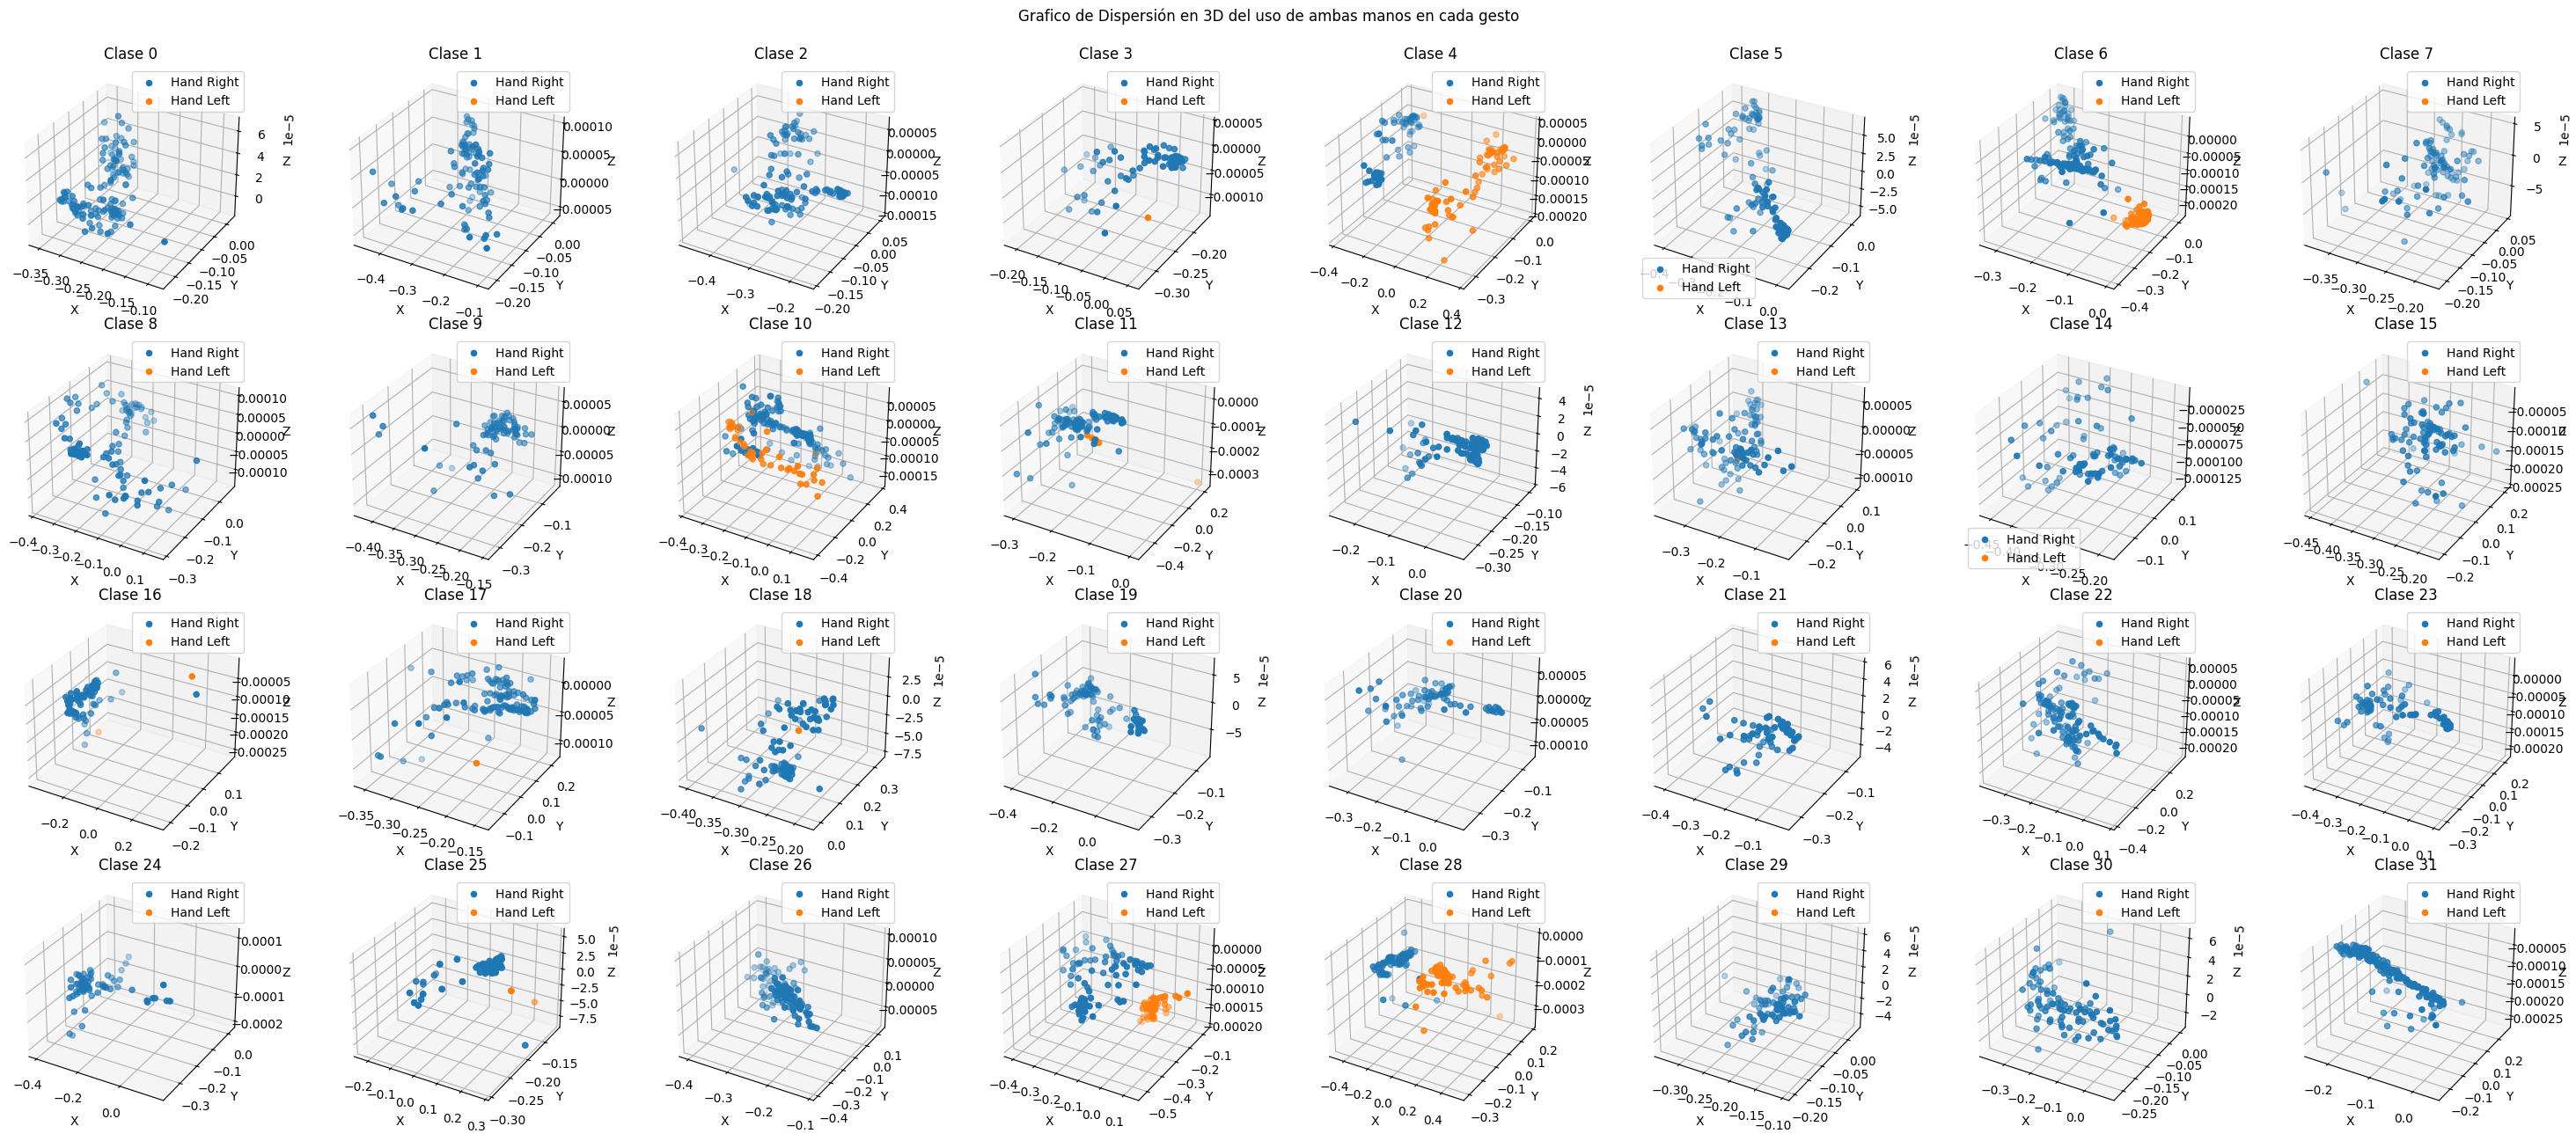

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Crear la figura y los ejes 3D
fig, ax = plt.subplots(4, 8, figsize=(30, 13), subplot_kw={'projection': '3d'})

# Iterar sobre las clases
for i, category in enumerate(df_3d['class'].unique()):
    row = i // 8
    col = i % 8
    
    # Iterar sobre los valores únicos de la columna 'hand'
    for hand_value in df_3d['hand'].unique():
        hand3d = df_3d[(df_3d['class'] == category) & (df_3d['hand'] == hand_value)]
        
        # Utilizar scatter con hue=hand
        ax[row, col].scatter(hand3d['k1x'], hand3d['k1y'], hand3d['k1z'], label=f'Hand {hand_value}')

    # Configurar etiquetas y título para cada subplot
    ax[row, col].set_xlabel('X')
    ax[row, col].set_ylabel('Y')
    ax[row, col].set_zlabel('Z')
    ax[row, col].set_title(f'Clase {category}')
    ax[row, col].legend()  # Mostrar leyenda

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.suptitle('Grafico de Dispersión en 3D del uso de ambas manos en cada gesto')
plt.show()



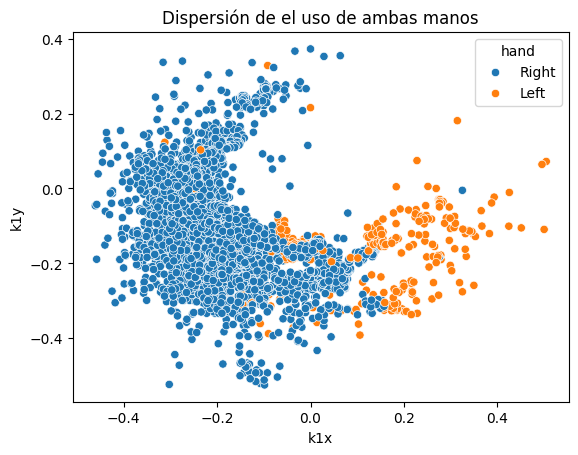

In [7]:
sns.scatterplot(df_2d, x='k1x', y='k1y', hue='hand')
plt.title('Dispersión de el uso de ambas manos')
plt.show()

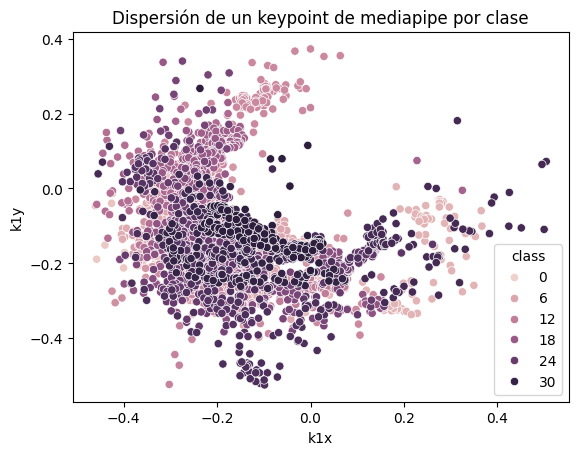

In [8]:
sns.scatterplot(df_2d, x='k1x', y='k1y', hue='class')
plt.title('Dispersión de un keypoint de mediapipe por clase')
plt.show()

## Limpieza de codigo

## Dynamic Time Warping

## Recurrent Neuronal Network (LTSM)

## Comparación de resultados

## Conclusión